For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

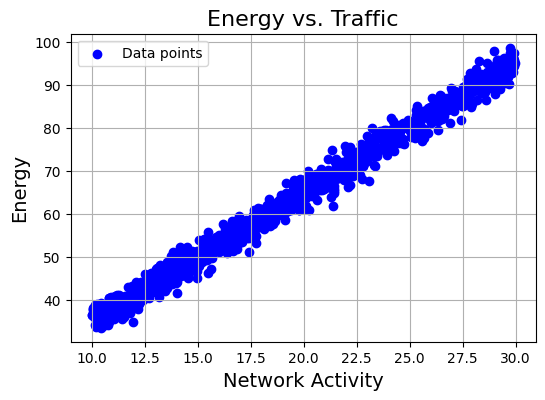

In [4]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### a) Visualize fitted curve and derive the energy consumption formula

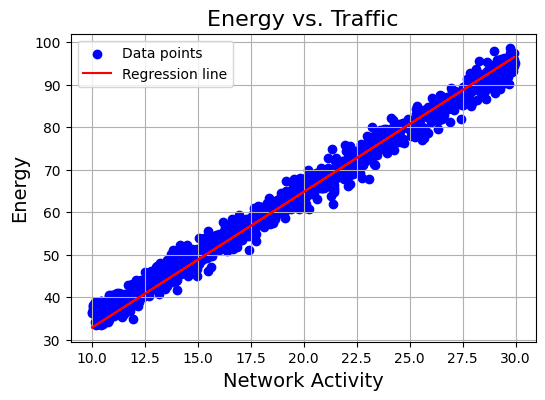

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

predictions = lr.predict(data['Net_Activity'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, color='red', label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

### ⚡ Energy Consumption Formula

In [6]:
# Extract learned parameters
w = lr.weights[0]   # slope
b = lr.bias         # intercept

print(f"Energy ≈ {w:.4f} * Net_Activity + {b:.4f}")


Energy ≈ 3.1969 * Net_Activity + 0.8138




From our fitted linear regression model, we derived the relationship:

$$
\mathrm{Energy} \approx w \cdot \mathrm{Net\_Activity} + b
$$


where:
- \(w\) is the slope (change in Energy per unit of Net Activity),
- \(b\) is the intercept (baseline Energy when Net Activity = 0).

This formula describes how SkyNet’s power usage scales with its network activity.


### b1) Analyze prediction error distribution

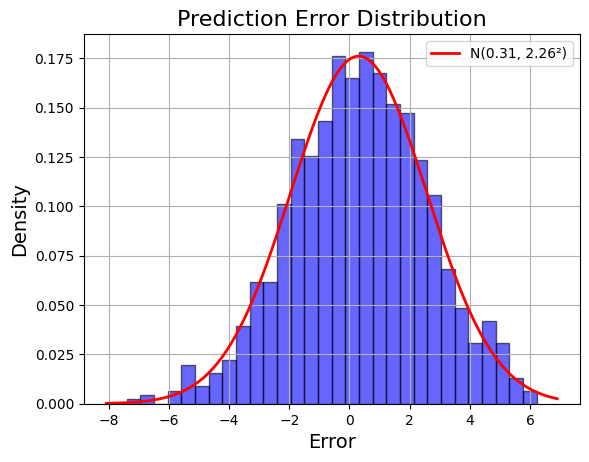

Mean error = 0.3079
Std of errors = 2.2656


In [7]:

from scipy.stats import norm, probplot

# Errors
errors = data['Energy'] - predictions
errors = errors.to_numpy()

# Fit normal distribution
mu, sigma = norm.fit(errors)

# Plot histogram
plt.hist(errors, bins=30, density=True, color='blue', edgecolor='black', alpha=0.6)

# Overlay normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r', linewidth=2, label=f'N({mu:.2f}, {sigma:.2f}²)')

plt.title('Prediction Error Distribution', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean error = {errors.mean():.4f}")
print(f"Std of errors = {errors.std(ddof=1):.4f}")



- The **histogram** shows how prediction errors are spread.  
- The **red curve** is the fitted normal distribution.  
- The **mean error** is close to 0 → the model is approximately unbiased.  


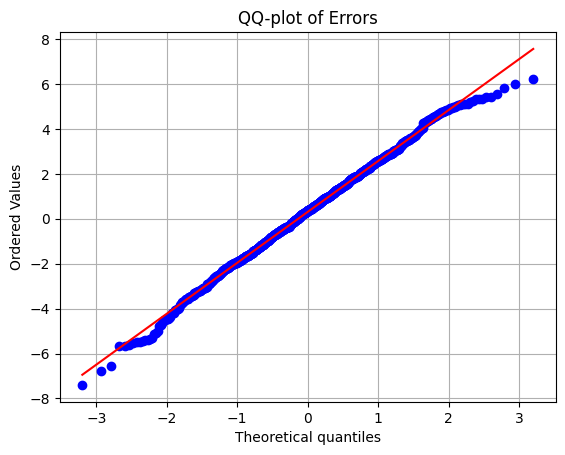

In [8]:
# QQ-plot
probplot(errors, dist="norm", plot=plt)
plt.title("QQ-plot of Errors")
plt.grid(True)
plt.show()



- Errors are roughly symmetric around 0.  
- Mean error ≈ 0 → predictions are not systematically biased.  
- QQ-plot shows how close the distribution of errors is to a normal curve.  


### b2) What is an unbiased estimator?

An **unbiased estimator** is a statistical estimator whose **expected value** equals the true value of the parameter it is estimating.

Formally, for an estimator $\hat{\theta}$ of a parameter $\theta$:

$$
\mathbb{E}[\hat{\theta}] = \theta
$$

This means that, if we could repeat the sampling process many times, the estimator would be correct **on average**.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [9]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train'].copy()
test = data[data['split'] == 'test'].copy()

In [10]:

from logistic_regression import LogisticRegression 

In [11]:
logr = LogisticRegression(learning_rate=0.01, epochs=10000)
logr.fit(train[["x0", "x1"]], train["y"])
predictions = logr.predict_classes(test[["x0", "x1"]])

accuracy = (predictions == test["y"]).mean()
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.4900


### Visualize data

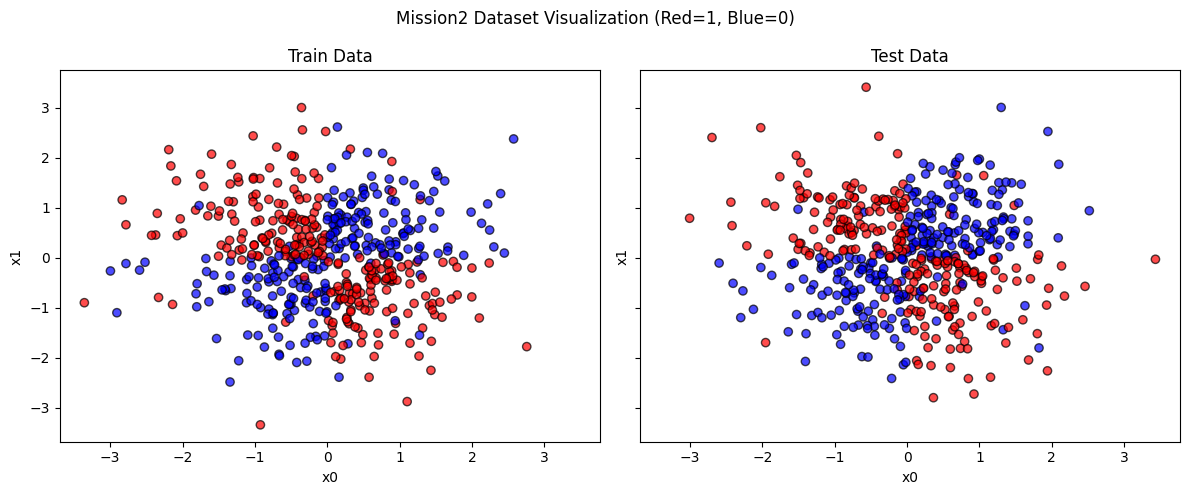

In [12]:

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Train set
axes[0].scatter(train["x0"], train["x1"], c=train["y"], cmap="bwr", alpha=0.7, edgecolors="k")
axes[0].set_title("Train Data")
axes[0].set_xlabel("x0")
axes[0].set_ylabel("x1")

# Test set
axes[1].scatter(test["x0"], test["x1"], c=test["y"], cmap="bwr", alpha=0.7, edgecolors="k")
axes[1].set_title("Test Data")
axes[1].set_xlabel("x0")
axes[1].set_ylabel("x1")

plt.suptitle("Mission2 Dataset Visualization (Red=1, Blue=0)")
plt.tight_layout()
plt.show()


### Feature Engineering

In [13]:
train["x0*x1"] = train["x0"] * train["x1"]
test["x0*x1"] = test["x0"] * test["x1"]

logr.fit(train[["x0", "x1", "x0*x1"]], train["y"])
predictions = logr.predict_classes(test[["x0", "x1", "x0*x1"]])
accuracy = (predictions == test["y"]).mean()
print(f"Test accuracy with new feature {accuracy:.4f}")     

Test accuracy with new feature 0.9000



   ### a. Explain poor initial performance and your improvements


   From plotting the data we see that the classes form a checkerboard pattern, which is not linearly separable. Logistic regression can only fit one straight line and therefore fails to classify the data. Since the data is centered around (0,0), by adding  x0*x1, the model can separate quadrants:

x0*x1 > 0 → top-left & bottom-right → class 1 (red)

x0*x1 < 0 → top-right & bottom-left → class 0 (blue)

   ### b. What is the model's inductive bias. Why is it important?

Logistic regression’s inductive bias = linear decision boundaries in feature space.

It’s important because it determines whether the model can represent the true class structure. If the bias doesn’t fit the problem like before we did feature engineering, the model fails no matter how much data you give it.

By adding interaction terms, we changed the hypothesis space.

Now the model’s inductive bias is: classes can be separated by a linear function of x0, x1, and their interaction.

This allows it to capture non-linear patterns like the checkerboard.

   ### c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   


In [14]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(train[["x0", "x1"]], train["y"])
predictions = dtc.predict(test[["x0", "x1"]])
accuracy = (predictions == test["y"]).mean()
print(f"Test accuracy with DecisionTreeClassifier: {accuracy:.4f}")

Test accuracy with DecisionTreeClassifier: 0.9280


It can solve the problem because of the non-linear decision boundaries of a decision tree.

   ### d. Plot the ROC curve

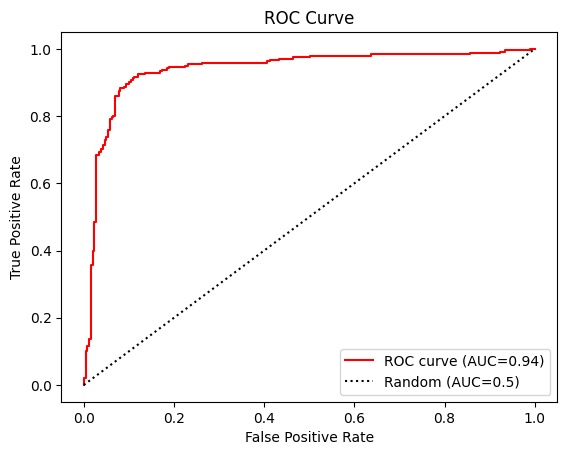

In [15]:
from sklearn import metrics

y_probs = logr.predict(test[["x0", "x1", "x0*x1"]])  
y_true = test["y"]

# ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probs, pos_label=1)
auc = round(metrics.roc_auc_score(y_true, y_probs), 2)

# Plot
plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc})", c="red")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [16]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [17]:
X_train = train.drop(columns=['target']).copy()
y_train = train['target'].copy()
X_test = test.drop(columns=['target']).copy()
y_test = test['target'].copy()

In [18]:
candidate_features = [f"data_stream_{i}" for i in range(11)]
methods = {
    "round": np.round,
    "floor": np.floor,
    "ceil": np.ceil
}
scales = [1, 10, 100, 1000]

results = []

for feat in candidate_features:
    for scale in scales:
        for name, func in methods.items():
            X_train_copy = X_train.copy()
            X_test_copy = X_test.copy()

            # transform and encode as even/odd
            X_train_copy[feat] = func(X_train_copy[feat] * scale).astype(int) % 2
            X_test_copy[feat] = func(X_test_copy[feat] * scale).astype(int) % 2

            # ⚡ use only this feature
            dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
            dtc.fit(X_train_copy[[feat]], y_train)

            # ⚡ use probabilities for AUC
            auc = metrics.roc_auc_score(y_test, dtc.predict_proba(X_test_copy[[feat]])[:,1])

            results.append((feat, name, scale, auc))

# Sort results
results = sorted(results, key=lambda x: x[3], reverse=True)
for feat, method, scale, auc in results[:10]:
    print(f"{feat} with {method}, scale={scale}: Test AUC = {auc:.3f}")

data_stream_3 with round, scale=1000: Test AUC = 0.650
data_stream_3 with ceil, scale=1000: Test AUC = 0.649
data_stream_3 with floor, scale=1000: Test AUC = 0.648
data_stream_0 with round, scale=10: Test AUC = 0.535
data_stream_1 with floor, scale=1: Test AUC = 0.525
data_stream_1 with ceil, scale=1: Test AUC = 0.525
data_stream_7 with round, scale=1: Test AUC = 0.524
data_stream_9 with floor, scale=1: Test AUC = 0.521
data_stream_9 with ceil, scale=1: Test AUC = 0.521
data_stream_5 with round, scale=10: Test AUC = 0.520


In [19]:
# Decrypt the feature with best AUC
encrypted_feature="data_stream_3"

X_train[encrypted_feature] = X_train[encrypted_feature]*1000
X_test[encrypted_feature] = X_test[encrypted_feature]*1000

# Round values
X_train[encrypted_feature] = np.round(X_train[encrypted_feature])
X_test[encrypted_feature] = np.round(X_test[encrypted_feature])


# Encode as 0 (even) or 1 (odd)
X_train[encrypted_feature] = X_train[encrypted_feature].astype(int) % 2
X_test[encrypted_feature] = X_test[encrypted_feature].astype(int) % 2

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid_search_params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=grid_search_params,
    scoring='roc_auc',
    cv=None,
    n_jobs=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
predicted_probs = best_model.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, predicted_probs)

print(f"Test accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.2f}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV AUC: 0.6993733242395141
Test accuracy: 0.8095
Test AUC: 0.72


### a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

I first found out what which feature needed to be decrypted, and in what way, by doing a grid search over the features themselves, scaling of the features and rounding functions. The evaluation criteria was ROC AUC on the test set. This gave `data_stream_3` which needed to be scaled by a factor 1000, and rounded to the nearest integer before doing the binary encoding.

Then I did another grid search to determine the best hyperparameters of the decision tree classifier, where the best one achieved the threshold AUC score of 0.72 on the test set.


### b. Justify ROC AUC usage. Plot and interpret ROC.

A binary classifier like our decision tree outputs probabilities between 0 and 1. To turn these into predictions, we need a threshold (often 0.5), but that choice is arbitrary. If we change the threshold, we change the trade-off between catching positives (true positive rate) and making false alarms (false positive rate).

The ROC curve shows this trade-off across all thresholds, and the area under the curve (AUC) gives us one number to summarize it. An AUC of 0.5 means random guessing, 1.0 means perfect classification. Our model reached about 0.72, which means it’s clearly better than chance and can separate the classes reasonably well.


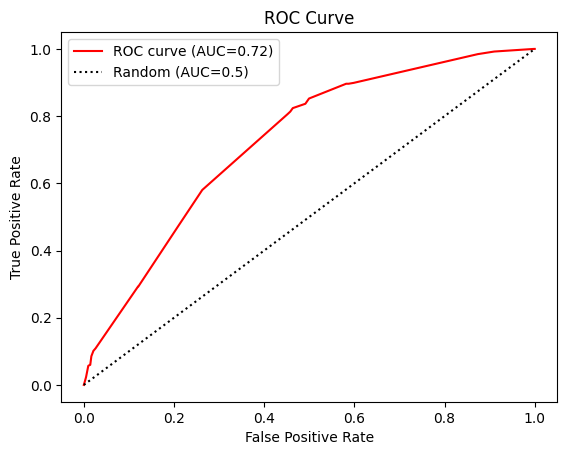

In [22]:
auc = round(auc, 2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_probs, pos_label=1)

# Plot
plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc})", c="red")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

RandomForestClassifier Test accuracy: 0.8145
RandomForestClassifier Test AUC: 0.72


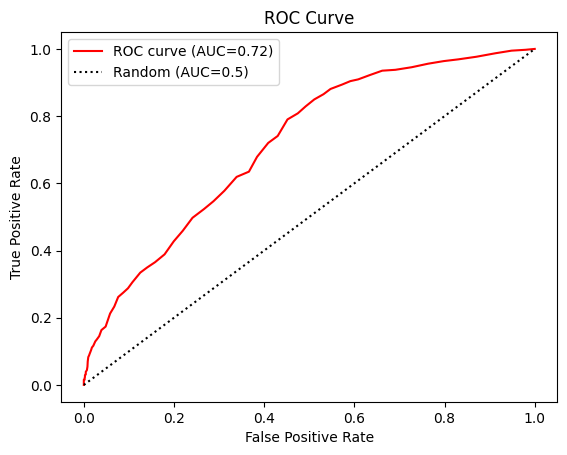

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
predicted_probs = rfc.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, predicted_probs)        

print(f"RandomForestClassifier Test accuracy: {accuracy:.4f}")
print(f"RandomForestClassifier Test AUC: {auc:.2f}")    

auc = round(auc, 2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_probs, pos_label=1)

# Plot
plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc})", c="red")
plt.plot([0,1], [0,1], c="black", ls="dotted", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

With only using the default hyperparameters, we achieve around the same AUC score as the tuned decision tree classifier every time we repeat the experiment.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [118]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [119]:

def repair_test(df):
    cols = df.columns.tolist()
    first, rest = cols[0], cols[1:]

    repaired = df.copy()
    # rotate row values for columns after ownership_type
    repaired[rest] = df[rest].apply(lambda row: row.shift(1), axis=1)
    repaired[rest[0]] = df[rest[-1]]
    return repaired

test = repair_test(test)    

In [120]:
print(train.isna().mean().sort_values(ascending=False).head(20))
print(test.isna().mean().sort_values(ascending=False).head(20))


energy_flow_design           0.757655
upper_collector_height       0.476401
shielded_harvesters          0.451793
ambient_harvesters           0.451793
efficiency_grade             0.421301
ownership_type               0.379214
internal_collectors          0.346661
external_collectors          0.346661
core_reactor_size            0.202749
harvesting_space             0.166717
shared_conversion_units      0.166287
isolated_conversion_units    0.166287
grid_connections             0.003436
power_chambers               0.000000
vertical_alignment           0.000000
nexus_rating                 0.000000
energy_footprint             0.000000
dtype: float64
energy_flow_design           0.741471
upper_collector_height       0.504981
shielded_harvesters          0.486565
ambient_harvesters           0.486565
efficiency_grade             0.398410
ownership_type               0.396699
internal_collectors          0.351011
external_collectors          0.351011
core_reactor_size            0.2247

In [121]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
# ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
# ax.set_xlabel('Nexus Rating', fontsize=14)
# ax.set_ylabel('Count', fontsize=14)

# train["nexus_rating"] = np.log(train["nexus_rating"])

# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
# ax.set_title('Log Transformed Nexus Rating Distribution (Train)', fontsize=16)
# ax.set_xlabel('Nexus Rating', fontsize=14)
# ax.set_ylabel('Count', fontsize=14)

In [122]:

# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Test Target Distribution')
# ax.set_title('Nexus Rating Distribution (Test)', fontsize=16)
# ax.set_xlabel('Nexus Rating', fontsize=14)
# ax.set_ylabel('Count', fontsize=14)

# test["nexus_rating"] = np.log(test["nexus_rating"])

# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# test['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Test Target Distribution')
# ax.set_title('Log transformed Nexus Rating Distribution (Test)', fontsize=16)
# ax.set_xlabel('Nexus Rating', fontsize=14)
# ax.set_ylabel('Count', fontsize=14)

In [123]:

# list of numerical features to log-transform
log_features = [
    "nexus_rating",
    "energy_footprint",
    "core_reactor_size",
    "harvesting_space",
    "vertical_alignment",
    "upper_collector_height"
]

# apply log(1+x) in case of zeros or missing values
for col in log_features:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

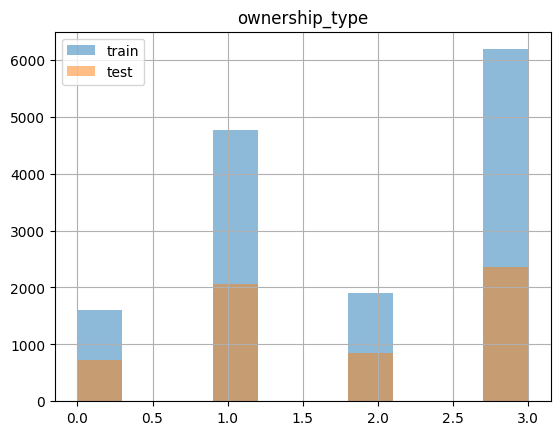

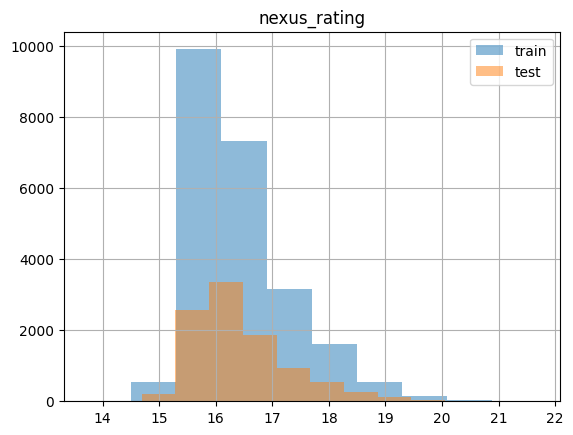

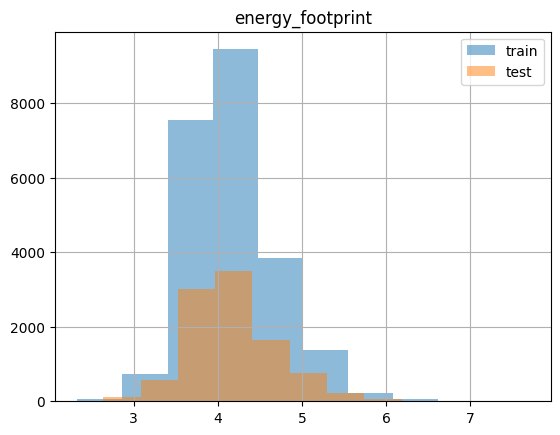

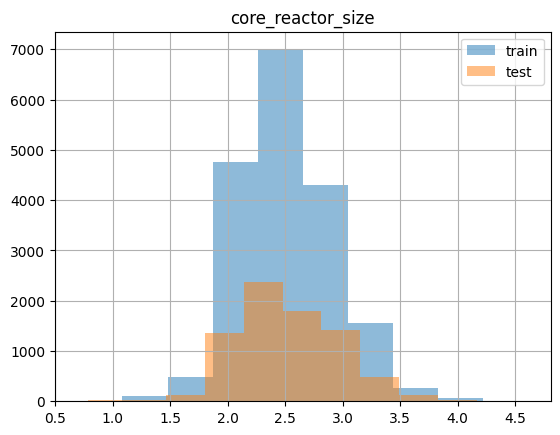

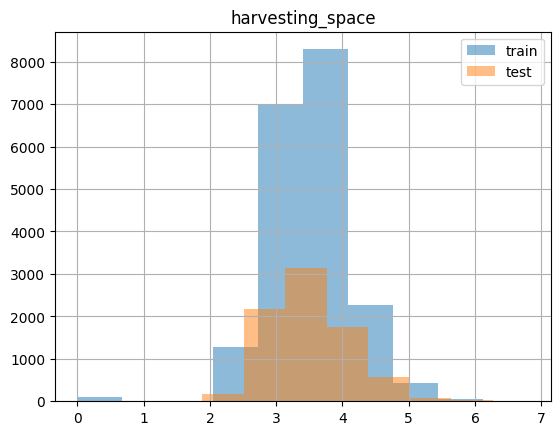

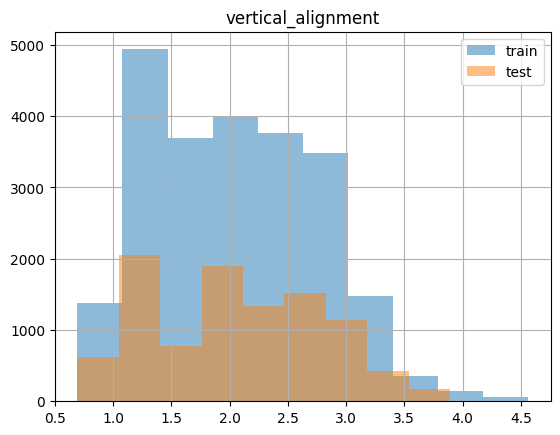

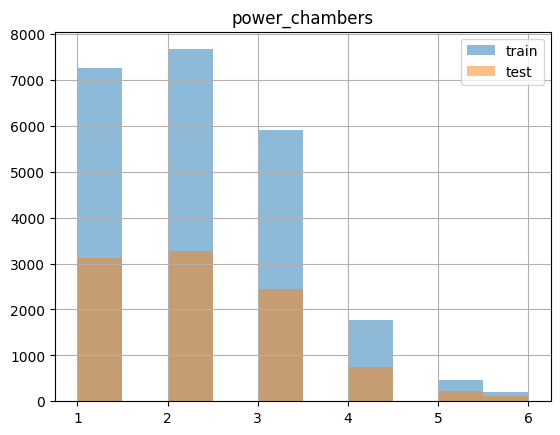

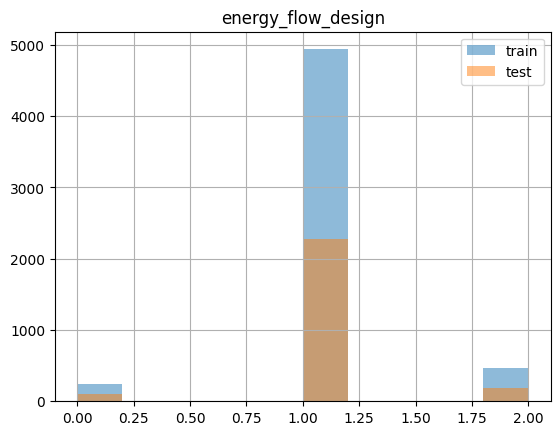

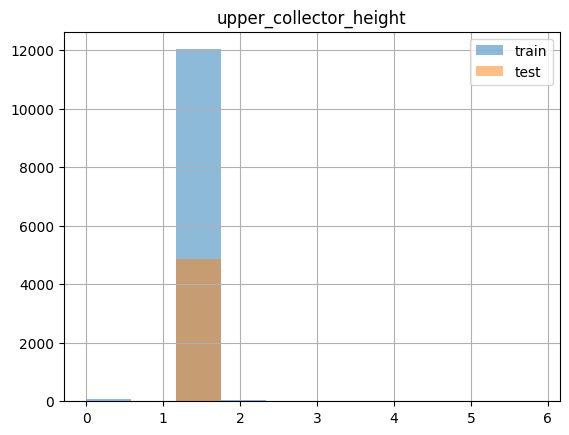

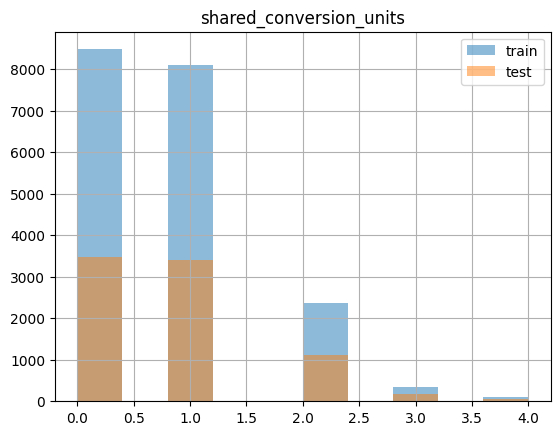

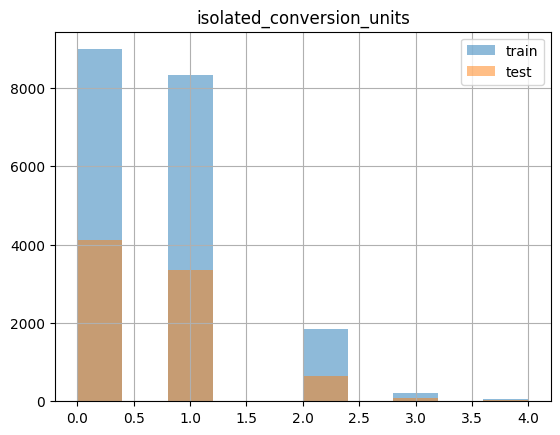

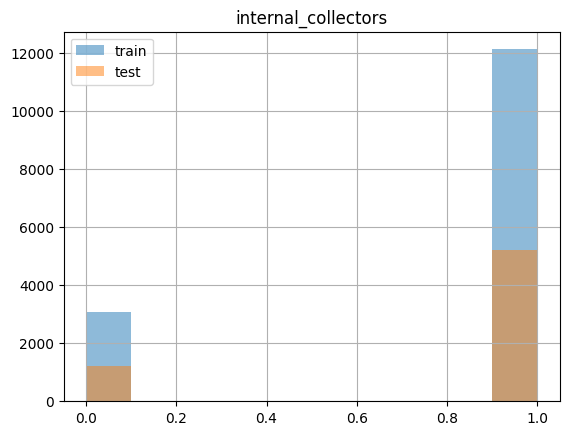

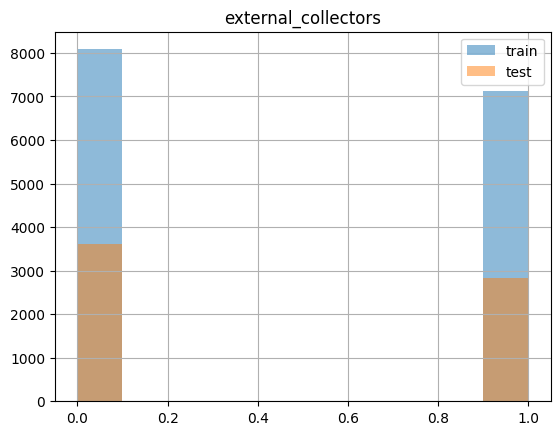

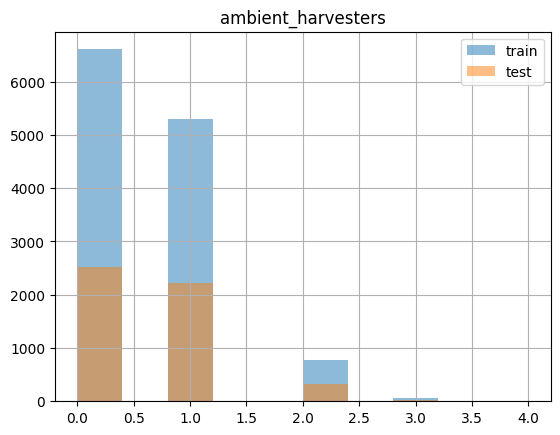

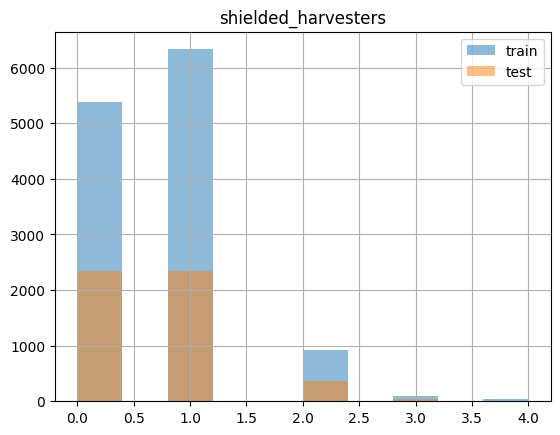

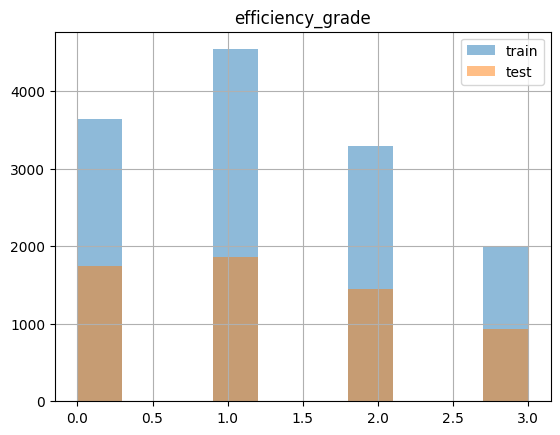

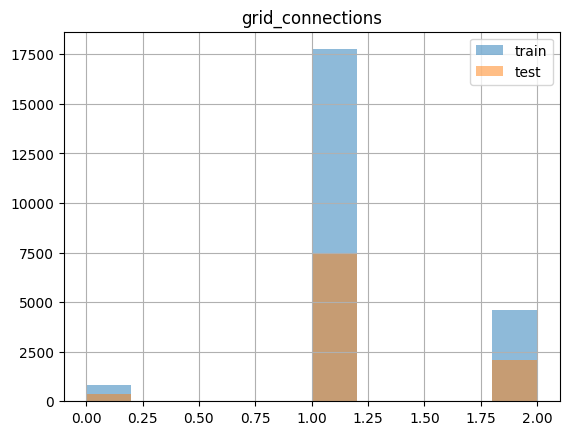

In [124]:
for col in train.columns:
    plt.figure()
    train[col].hist(alpha=0.5, label='train')
    test[col].hist(alpha=0.5, label='test')
    plt.title(col)
    plt.legend()
    plt.show()

In [135]:
X_train = train.drop(columns=['nexus_rating']).copy()
y_train = train['nexus_rating'].copy()
    
X_test = test.drop(columns=['nexus_rating']).copy()
y_test = test['nexus_rating'].copy()

In [136]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [137]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split


# ---------- Finn kategoriske features ----------
# Ta med dtype 'object' ELLER lav kardinalitet (f.eks. <= 20 unike verdier) som kategorisk
cat_cols = []
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        cat_cols.append(col)
    else:
        nunique = X_train[col].nunique(dropna=True)
        if 2 <= nunique <= 20:  # terskel kan justeres
            cat_cols.append(col)

# CatBoost aksepterer enten kolonnenavn eller indeks for cat_features
cat_features = cat_cols  # kolonnenavn er greit når vi bruker DataFrame

# After finding cat_features and splitting:
X_tr, X_val, y_tr_log, y_val_log = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Convert cat features to string
for col in cat_features:
    X_tr[col] = X_tr[col].astype(str)
    X_val[col] = X_val[col].astype(str)
    X_test[col] = X_test[col].astype(str)

train_pool = Pool(X_tr, y_tr_log, cat_features=cat_features)
valid_pool = Pool(X_val, y_val_log, cat_features=cat_features)
test_pool  = Pool(X_test, None, cat_features=cat_features)


# ---------- Modell ----------
model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.03,
    depth=6,
    loss_function="RMSE",   # måler MSLE i log-rom under trening
    eval_metric="RMSE",
    random_seed=5,
    early_stopping_rounds=200,
    verbose=200
)

model.fit(train_pool, eval_set=valid_pool, use_best_model=True)

# ---------- Prediksjon + inverse transform ----------
y_pred_log = model.predict(test_pool)        # prediksjoner i log-rom
y_pred = np.expm1(y_pred_log)                # tilbake til original skala
y_test = np.expm1(y_test)                      # tilbake til original skala

# ---------- Baseline for sammenligning ----------
# naive baseline: alltid median på TRAIN (original skala)
baseline = np.median(y_train)
rmse_base = np.sqrt(metrics.mean_squared_error(y_test, np.full_like(y_test, baseline)))

# ---------- Evaluering ----------
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae  = metrics.mean_absolute_error(y_test, y_pred)
r2   = metrics.r2_score(y_test, y_pred)

print(f"Baseline RMSE (median): {rmse_base:,.2f}")
print(f"CatBoost RMSE:         {rmse:,.2f}")
print(f"CatBoost MAE:          {mae:,.2f}")
print(f"CatBoost R²:           {r2:.4f}")

# ---------- (Valgfritt) Sjekk at vi faktisk bruker kategorier ----------
# Viktig: se at flere av de lav-kardinale kolonnene virkelig er i cat_features
print("Antall kategoriske features:", len(cat_features))
print("Eksempler:", cat_features[:10])

0:	learn: 0.8392596	test: 0.8698444	best: 0.8698444 (0)	total: 7.41ms	remaining: 37.1s
200:	learn: 0.3199420	test: 0.3268331	best: 0.3268331 (200)	total: 1.15s	remaining: 27.4s
400:	learn: 0.3013559	test: 0.3115807	best: 0.3115807 (400)	total: 2.19s	remaining: 25.2s
600:	learn: 0.2892768	test: 0.3045431	best: 0.3045431 (600)	total: 3.29s	remaining: 24.1s
800:	learn: 0.2808635	test: 0.3003402	best: 0.3003402 (800)	total: 4.38s	remaining: 22.9s
1000:	learn: 0.2744928	test: 0.2980184	best: 0.2980184 (1000)	total: 5.51s	remaining: 22s
1200:	learn: 0.2689495	test: 0.2962651	best: 0.2962651 (1200)	total: 6.68s	remaining: 21.1s
1400:	learn: 0.2642908	test: 0.2948024	best: 0.2947869 (1399)	total: 7.82s	remaining: 20.1s
1600:	learn: 0.2602075	test: 0.2938744	best: 0.2938744 (1600)	total: 8.96s	remaining: 19s
1800:	learn: 0.2567671	test: 0.2929974	best: 0.2929895 (1799)	total: 10.1s	remaining: 18s
2000:	learn: 0.2535581	test: 0.2923273	best: 0.2923273 (2000)	total: 11.3s	remaining: 16.9s
2200:	l

In [138]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [139]:
print('RMSLE: ', rmsle(y_test, y_pred))
print('Required RMSLE: ', 0.294)

RMSLE:  0.29773141515741536
Required RMSLE:  0.294


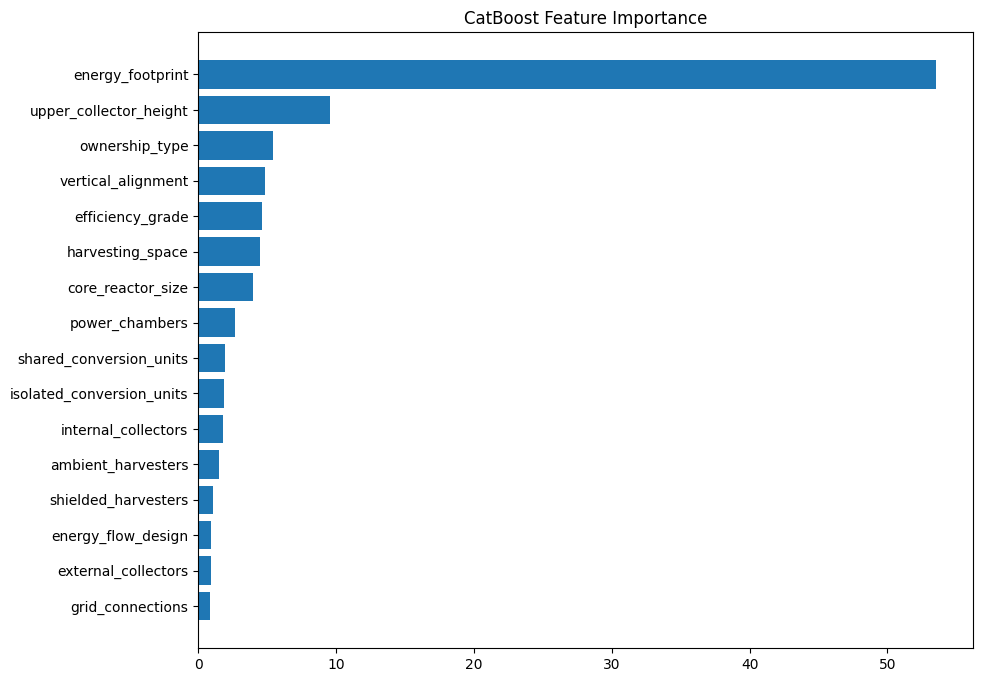

In [140]:
# Feature importance
fi = model.get_feature_importance(train_pool, type="PredictionValuesChange")
fi_df = pd.DataFrame({"Feature": X_train.columns, "Importance": fi}).sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.title("CatBoost Feature Importance")
plt.show()